# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import time

# Import API key
from apikeys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units="metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [4]:
cities=cities[0:-1]
responses = []

for city in cities:
    response = requests.get(query_url + city).json()
    responses.append(response)


In [5]:
raw_df = pd.json_normalize(responses)


In [6]:
raw_df

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,wind.deg,wind.gust,clouds.all,sys.type,sys.id,sys.country,sys.sunrise,sys.sunset,rain.1h,message
0,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627782e+09,7200.0,3174050.0,Province of Mantua,200,10.7833,45.1667,...,250.0,2.81,54.0,2.0,2009479.0,IT,1.627791e+09,1.627843e+09,NaN,NaN
1,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627783e+09,7200.0,3361934.0,Saldanha,200,17.9442,-33.0117,...,192.0,3.54,73.0,1.0,1943.0,ZA,1.627796e+09,1.627834e+09,NaN,NaN
2,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,99.0,1.627783e+09,25200.0,1507390.0,Dikson,200,80.5464,73.5069,...,208.0,9.36,100.0,NaN,NaN,RU,0.000000e+00,0.000000e+00,NaN,NaN
3,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627783e+09,18000.0,1168312.0,Pasni,200,63.4710,25.2631,...,224.0,3.95,88.0,NaN,NaN,PK,1.627780e+09,1.627828e+09,NaN,NaN
4,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627783e+09,-14400.0,5919850.0,Chapais,200,-74.8492,49.7834,...,267.0,7.81,94.0,1.0,859.0,CA,1.627724e+09,1.627779e+09,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627783e+09,-10800.0,3455461.0,Palmares do Sul,200,-50.5097,-30.2578,...,44.0,9.52,87.0,NaN,NaN,BR,1.627726e+09,1.627764e+09,NaN,NaN
605,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627783e+09,3600.0,2259655.0,Impfondo,200,18.0667,1.6381,...,332.0,2.35,100.0,NaN,NaN,CG,1.627793e+09,1.627837e+09,NaN,NaN
606,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000.0,1.627783e+09,-10800.0,3401148.0,Cururupu,200,-44.8683,-1.8283,...,30.0,1.16,9.0,NaN,NaN,BR,1.627722e+09,1.627766e+09,NaN,NaN
607,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627783e+09,-18000.0,3521972.0,Panabá,200,-88.2667,21.2833,...,61.0,8.43,60.0,NaN,NaN,MX,1.627731e+09,1.627778e+09,NaN,NaN


In [10]:
weather_df = raw_df[['name', 'coord.lat','coord.lon','main.temp_max', 'main.humidity','clouds.all','wind.speed','sys.country','dt']]
weather_df.columns = ["city", "Lat", "Lon", "max_temp","Humidity","Cloudiness","Wind Speed","Country","Date"]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [11]:
weather_df.describe()

,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Date
count,553.000000,553.000000,553.000000,553.000000,553.000000,553.000000,5.530000e+02
mean,19.646434,20.765173,20.660054,69.660036,55.754069,3.503183,1.627783e+09
std,33.161217,88.160054,7.699079,21.674473,39.929842,2.442498,5.947669e+01
min,-54.800000,-179.166700,-1.280000,14.000000,0.000000,0.000000,1.627782e+09
25%,-8.761900,-54.333300,14.900000,59.000000,11.000000,1.630000,1.627783e+09
50%,22.678300,23.539500,21.610000,74.000000,68.000000,2.870000,1.627783e+09
75%,48.045700,100.883300,27.120000,86.000000,97.000000,5.000000,1.627783e+09
max,78.218600,179.316700,36.560000,100.000000,100.000000,13.370000,1.627783e+09


In [12]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609 entries, 0 to 608
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        553 non-null    object 
 1   Lat         553 non-null    float64
 2   Lon         553 non-null    float64
 3   max_temp    553 non-null    float64
 4   Humidity    553 non-null    float64
 5   Cloudiness  553 non-null    float64
 6   Wind Speed  553 non-null    float64
 7   Country     553 non-null    object 
 8   Date        553 non-null    float64
dtypes: float64(7), object(2)
memory usage: 42.9+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
 #  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]
clean_city_data = weather_df.sort_values("Humidity").reset_index(drop=False)
clean_city_data.head()

,index,city,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,202,Baharly,38.4362,57.4316,25.76,14.0,10.0,1.88,TM,1.627783e+09
1,226,Agadez,19.7500,10.2500,31.38,14.0,6.0,4.43,NE,1.627783e+09
2,121,Riyadh,24.6877,46.7219,32.08,15.0,54.0,2.97,SA,1.627782e+09
3,587,Shubarshi,48.5872,57.1869,24.89,16.0,0.0,1.26,KZ,1.627783e+09
4,219,Sabha,27.0377,14.4283,29.20,16.0,0.0,4.01,LY,1.627783e+09


In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data.dropna(how='any',inplace=True)
clean_city_data

,index,city,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,202,Baharly,38.4362,57.4316,25.76,14.0,10.0,1.88,TM,1.627783e+09
1,226,Agadez,19.7500,10.2500,31.38,14.0,6.0,4.43,NE,1.627783e+09
2,121,Riyadh,24.6877,46.7219,32.08,15.0,54.0,2.97,SA,1.627782e+09
3,587,Shubarshi,48.5872,57.1869,24.89,16.0,0.0,1.26,KZ,1.627783e+09
4,219,Sabha,27.0377,14.4283,29.20,16.0,0.0,4.01,LY,1.627783e+09
...,...,...,...,...,...,...,...,...,...,...
548,476,Gunjur,13.2019,-16.7339,23.04,100.0,75.0,0.00,GM,1.627783e+09
549,323,Visby,57.6409,18.2960,16.03,100.0,90.0,2.06,SE,1.627783e+09
550,230,Santa Rita,-7.1139,-34.9781,22.37,100.0,75.0,2.57,BR,1.627783e+09
551,2,Dikson,73.5069,80.5464,4.40,100.0,100.0,7.22,RU,1.627783e+09


In [15]:
clean_city_data=clean_city_data[:500]
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       500 non-null    int64  
 1   city        500 non-null    object 
 2   Lat         500 non-null    float64
 3   Lon         500 non-null    float64
 4   max_temp    500 non-null    float64
 5   Humidity    500 non-null    float64
 6   Cloudiness  500 non-null    float64
 7   Wind Speed  500 non-null    float64
 8   Country     500 non-null    object 
 9   Date        500 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 43.0+ KB


In [16]:
clean_city_data.to_csv('../output_data/citiesApi.csv', index=False)


In [18]:
clean_city_data.tail()

,index,city,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
495,380,Kalyazin,57.2403,37.8433,13.51,94.0,98.0,2.90,RU,1.627783e+09
496,125,San Nicolas,18.1725,120.5953,27.95,94.0,90.0,5.66,PH,1.627783e+09
497,306,Aasiaat,68.7098,-52.8699,4.11,94.0,100.0,2.96,GL,1.627783e+09
498,400,Arrondissement de Thionville,49.3333,6.3333,14.94,94.0,100.0,1.23,FR,1.627783e+09
499,492,La Asuncion,11.0333,-63.8628,26.85,94.0,75.0,5.14,VE,1.627783e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

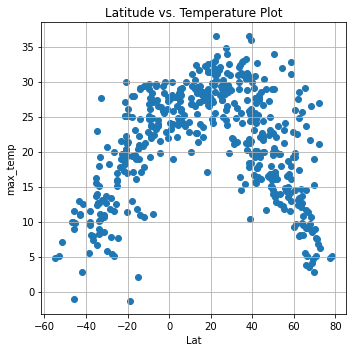

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(clean_city_data['Lat'],clean_city_data['max_temp'])
plt.xlabel("Lat")
plt.ylabel("max_temp")
plt.grid()
plt.title("Latitude vs. Temperature Plot")

plt.tight_layout()

plt.show()

## Latitude vs. Humidity Plot

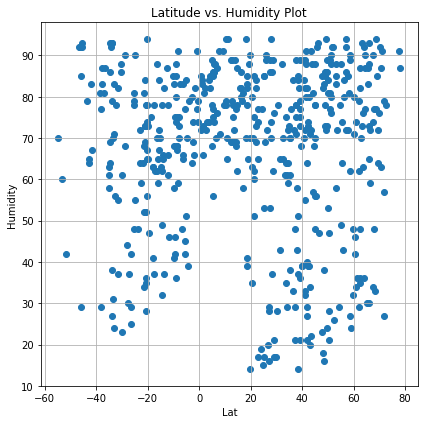

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.grid()
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

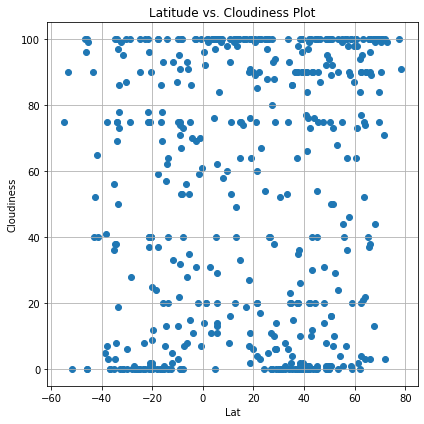

In [21]:
plt.figure(figsize=(6,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.grid()
plt.tight_layout()

plt.show()

## Latitude vs. Wind Speed Plot

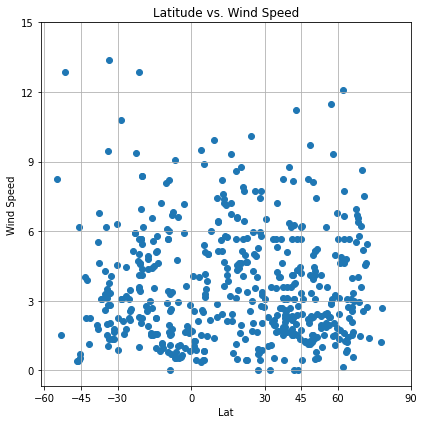

In [22]:
plt.figure(figsize=(6,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid()
plt.title("Latitude vs. Wind Speed")

plt.yticks([0,3,6,9,12,15])
plt.xticks([-60,-45,-30,0,30,45,60,90])
plt.tight_layout()

plt.show()

## Linear Regression

In [23]:
Northern_city_data=clean_city_data.loc[clean_city_data["Lat"] > 0]
Northern_city_data = Northern_city_data.sort_values("Lat").reset_index(drop=False)
Northern_city_data.head()
Northern_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     335 non-null    int64  
 1   index       335 non-null    int64  
 2   city        335 non-null    object 
 3   Lat         335 non-null    float64
 4   Lon         335 non-null    float64
 5   max_temp    335 non-null    float64
 6   Humidity    335 non-null    float64
 7   Cloudiness  335 non-null    float64
 8   Wind Speed  335 non-null    float64
 9   Country     335 non-null    object 
 10  Date        335 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 28.9+ KB


In [24]:
Southern_city_data=clean_city_data.loc[clean_city_data["Lat"] < 0]
Southern_city_data = Southern_city_data.sort_values("Lat").reset_index(drop=False)
Southern_city_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     165 non-null    int64  
 1   index       165 non-null    int64  
 2   city        165 non-null    object 
 3   Lat         165 non-null    float64
 4   Lon         165 non-null    float64
 5   max_temp    165 non-null    float64
 6   Humidity    165 non-null    float64
 7   Cloudiness  165 non-null    float64
 8   Wind Speed  165 non-null    float64
 9   Country     165 non-null    object 
 10  Date        165 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [42]:
x_values = Southern_city_data["Lat"]
y_values = Southern_city_data["max_temp"]
plot_linear_regression(x_values, y_values, 'max_temp',(6,30))


NameError: name 'plot_linear_regression' is not defined

-0.64463473862719


<Figure size 576x576 with 0 Axes>

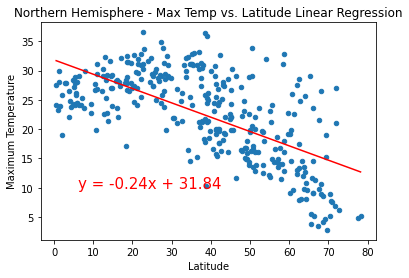

In [25]:
slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["max_temp"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="max_temp")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.7408975986047626


NameError: name 'plot_linear_regression' is not defined

<Figure size 576x576 with 0 Axes>

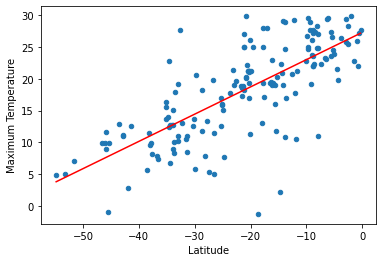

In [43]:
slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["max_temp"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="max_temp")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

#line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.annotate(line_eq,(6,10),fontsize=15,color="red")
x_values = Southern_city_data["Lat"]
y_values = Southern_city_data["max_temp"]
plot_linear_regression(x_values, y_values, 'max_temp',(6,30))

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.10182742745202221


<Figure size 576x576 with 0 Axes>

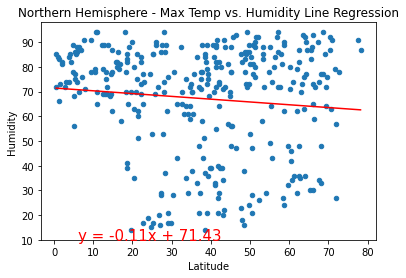

In [27]:

slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["Humidity"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Humidity Line Regression")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

-0.0029546020080714495


<Figure size 576x576 with 0 Axes>

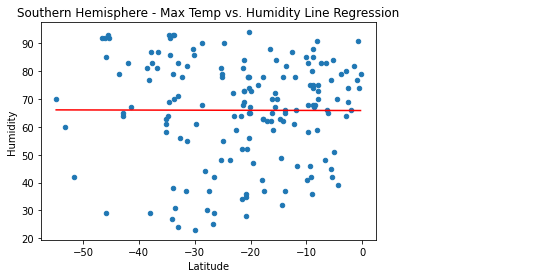

In [35]:

slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["Humidity"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Humidity Line Regression")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.018748708336683614


<Figure size 576x576 with 0 Axes>

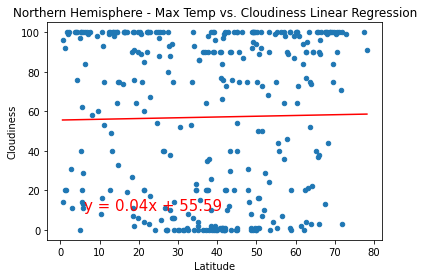

In [33]:
slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["Cloudiness"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Cloudiness Linear Regression")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.025251411991853538


<Figure size 576x576 with 0 Axes>

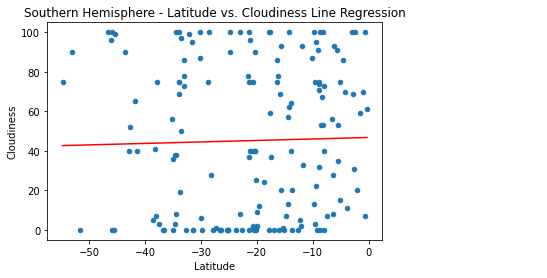

In [30]:
slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["Cloudiness"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness Line Regression")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.05460847657155193


<Figure size 576x576 with 0 Axes>

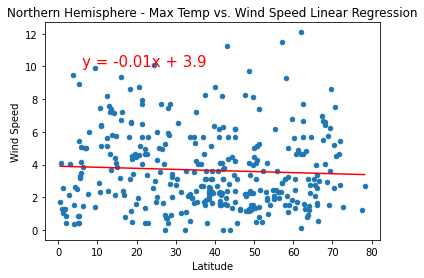

In [32]:
slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["Wind Speed"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Wind Speed Linear Regression")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.08279704566338754


<Figure size 576x576 with 0 Axes>

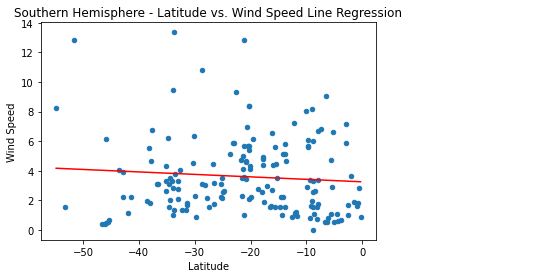

In [31]:
slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["Wind Speed"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed Line Regression")

plt.show()
